In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the pre-processed data
df = pd.read_csv('./data/clean_data.csv')
df = df.drop(columns='Unnamed: 0')

# read the original data only for analytics purpose
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

 ## Data Analysis
 We have four dataframes to analyse:
 - profile
 - portfolio
 - transcript
 - pre-processed df
 
 This notebook is dedicated to investigate the data.
 
#### (A) profile

In [3]:
# peek into the data
profile.head(5)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [4]:
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [5]:
profile.loc[(profile['gender'].isnull()) & (profile['income'].isnull()) & (profile['age']==118)].shape 

(2175, 5)

<font color='green'>**Observations:**</font> Age as high as 118 is present in the data. And the corresponding income of 118 years old is NaN. We will filter that out. These are 2175 such rows.


In [6]:
profile = profile.loc[profile['gender'].isnull() == False]

In [7]:
print('Column names: ',list(profile.columns))
print()
print(profile.describe())
print('\nThe total number of unique id of people are {}.'.format(len(profile['id'].unique().tolist())))
print('The total number of rows in the data are {}.'.format(profile.shape[0]))

Column names:  ['age', 'became_member_on', 'gender', 'id', 'income']

                age  became_member_on         income
count  14825.000000      1.482500e+04   14825.000000
mean      54.393524      2.016689e+07   65404.991568
std       17.383705      1.188565e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       42.000000      2.016052e+07   49000.000000
50%       55.000000      2.017080e+07   64000.000000
75%       66.000000      2.017123e+07   80000.000000
max      101.000000      2.018073e+07  120000.000000

The total number of unique id of people are 14825.
The total number of rows in the data are 14825.


In [8]:
# Rename the column and convert it to date type
profile['member_on'] = pd.to_datetime(profile['became_member_on'].astype(str)).dt.date
profile.drop('became_member_on', 1, inplace=True)

#### Visualization of profile data
**Observation 2:**
- Males dominate in the gender attribute.
- Average income of the customers is around 65000.
- Average age of the customers is 54.
- Most people became member in 2018.

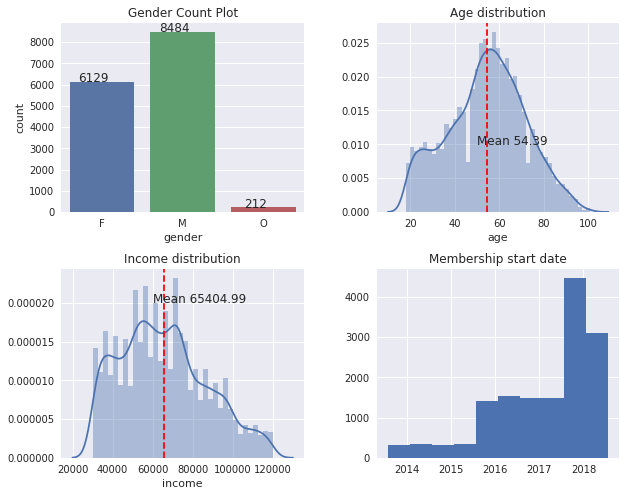

In [10]:
f, axes = plt.subplots(2, 2, figsize=(10,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(style="darkgrid")

plt.subplot(221)
ax = sns.countplot(x="gender", data=profile)
plt.title('Gender Count Plot')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.3, p.get_height(), str(round(p.get_height(),2)),
            ha="center") 

plt.subplot(222)
mean=profile['age'].mean()
ax = sns.distplot(profile["age"])
plt.axvline(mean,color='r', linestyle='--')
plt.text(50,0.010,'Mean {}'.format(round(mean,2)))
plt.title('Age distribution')

plt.subplot(223)
mean = profile['income'].mean()
ax = sns.distplot(profile["income"])
plt.axvline(mean, color='r', linestyle='--')
plt.text(60000,0.000020,'Mean {}'.format(round(mean,2)))
plt.title('Income distribution')

plt.subplot(224)
plt.title('Membership start date')
profile['member_on'].hist()  

plt.show()

#### (B) portfolio 

In [145]:
# peek into the data
portfolio.head(5)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


We have three types of offers present:
- bogo
- informational
- discount


In [146]:
portfolio.offer_type.value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

In [147]:
df.bogo.value_counts()

0    39402
1    26183
Name: bogo, dtype: int64

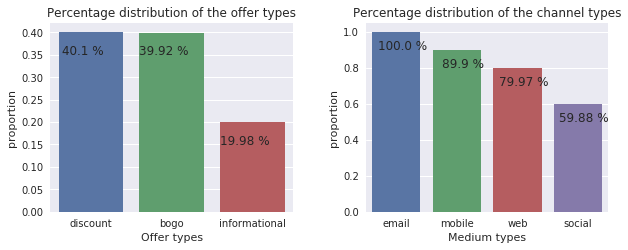

In [11]:
total = df.shape[0]

f, axes = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
sns.set(style="darkgrid")

plt.subplot(221)
bogo_present = df.bogo.value_counts().loc[1] / total
info_present = df.informational.value_counts().loc[1] / total
discount_present = df.discount.value_counts().loc[1] / total
# initialize list of lists 
temp = [['bogo', bogo_present], ['informational', info_present], ['discount', discount_present]] 
# Create the pandas DataFrame 
temp_df = pd.DataFrame(temp, columns = ['offer', 'frequency']).sort_values('frequency',ascending=False) 
ax = sns.barplot(x="offer", y="frequency", data=temp_df)
plt.title('Percentage distribution of the offer types')
ax.set(xlabel='Offer types', ylabel='proportion')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.3, p.get_height()-0.05, str(round(p.get_height()* 100,2))+' %',
            ha="center") 
    
plt.subplot(222)
email_count = df.email.value_counts().loc[1]/ total
web_count = df.web.value_counts().loc[1]/ total
social_count = df.social.value_counts().loc[1]/ total
mobile_count = df.mobile.value_counts().loc[1]/ total
# initialize list of lists 
temp = [['email', email_count], ['web', web_count], ['social', social_count], ['mobile', mobile_count]] 
# Create the pandas DataFrame 
temp_df = pd.DataFrame(temp, columns = ['channel', 'frequency']).sort_values('frequency', ascending=False) 
ax = sns.barplot(x="channel", y="frequency", data=temp_df)
plt.title('Percentage distribution of the channel types')
ax.set(xlabel='Medium types', ylabel='proportion')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.5, p.get_height()-0.10, str(round(p.get_height()* 100,2))+' %',
            ha="center") 
    

**Note:**
- Left most graph represents how much share of all the offer types are discount, bogo and informational. 
- Right most of the graph represents the same but for the channel.

<font color='green'>**Observations:**</font>
- Bogo and discount offers are sent to the customers almost equally ~40%.
- All the offers are sent via email channel. After email, mobile is the preferred medium.
- Max duration of any offer is 10 days and the minimum is 3 days.

In [149]:
print('Max duration of any offer is {} days and the minimum is {} days.'.format(df.duration.max(), df.duration.min()))

Max duration of any offer is 10 days and the minimum is 3 days.


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


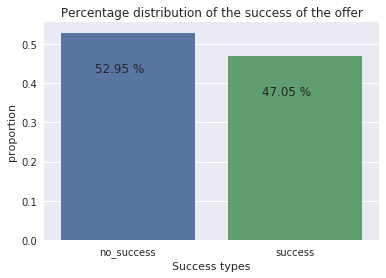

In [150]:
# check how many offers are success and not-success

no_success = df.offersuccessful.value_counts().loc[0]/ total
success = df.offersuccessful.value_counts().loc[1]/ total
# initialize list of lists 
temp = [['no_success', no_success], ['success', success]] 
# Create the pandas DataFrame 
temp_df = pd.DataFrame(temp, columns = ['attribute', 'frequency']) 
ax = sns.barplot(x="attribute", y="frequency", data=temp_df)
plt.title('Percentage distribution of the success of the offer',**csfont)
ax.set(xlabel='Success types', ylabel='proportion')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.35, p.get_height()-0.10, str(round(p.get_height()* 100,2))+' %',
            ha="center") 

<font color="green">**Observations:**</font>
Only 47% of the offers turn into a success. Success is basically defined as the offers which get converted into a completed transaction.
<br>
<br>


Now we are interested to dig deep into the statistics of different attributes as per the offer success.

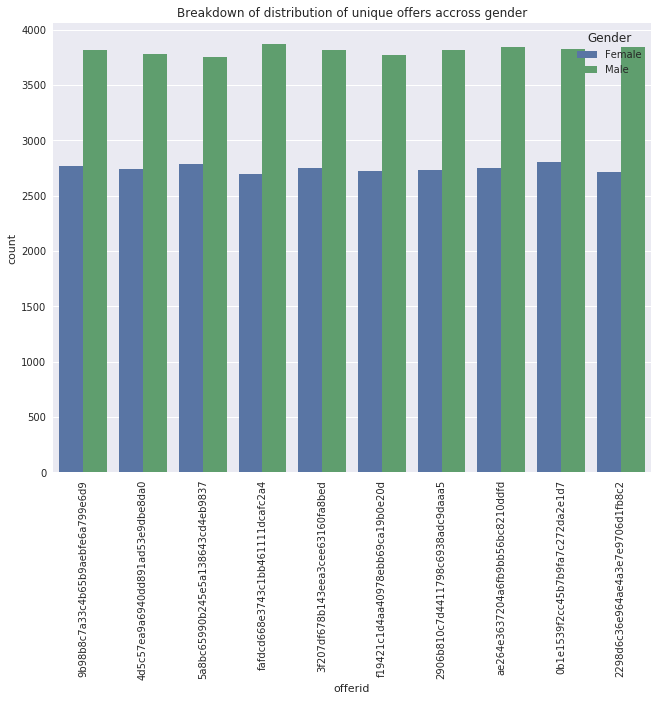

In [167]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
ax = sns.countplot(x="offerid", hue="gender", data=df)
ax.axes.set_title("Breakdown of distribution of unique offers accross gender")
plt.legend(fontsize=15, title="sport");
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
h, l = ax.get_legend_handles_labels()
ax.legend(h, ["Female", "Male"], title="Gender", loc="upper right")


<font color="green">**Observations:**</font> Above plot shows that the males receive more offers. There is no biasness in sending offers accross different offer types. Clearly females receive less offers as compared to the males but this may be due to the fact that this data captures less number of records for the female population.<br><br>
Only 47% of the offers got successfull (completed).

In [168]:
print('Success rate of conversion of the offers is: {}'.format(round(df['offersuccessful'].sum()/df.shape[0],2)))

Success rate of conversion of the offers is: 0.47


#### Look into the success rate of the offers accross different unique offer ids

In [153]:
t_success = pd.DataFrame(df.groupby('offerid')['offersuccessful'].sum()).reset_index()
t_total = pd.DataFrame(df.groupby('offerid')['offersuccessful'].count()).reset_index()
t_total.columns = ['offerid','total_count']
t_success.columns=['offerid','success_count']
t = pd.merge(left=t_success, right=t_total, left_on='offerid', right_on='offerid')
t['no_success_count'] = t['total_count'] - t['success_count']
t['success_rate'] = (t["success_count"]/t["total_count"])
t['no_success_rate'] = (t["no_success_count"]/t["total_count"])
t = t.drop(['success_count','total_count','no_success_count'],1)

In [169]:
t = t.sort_values(by=['success_rate'], ascending=False)
t.head(10)

,offerid,success_rate,no_success_rate
9,fafdcd668e3743c1bb461111dcafc2a4,0.752895,0.247105
1,2298d6c36e964ae4a3e7e9706d1fb8c2,0.727411,0.272589
8,f19421c1d4aa40978ebb69ca19b0e20d,0.614519,0.385481
7,ae264e3637204a6fb9bb56bc8210ddfd,0.545220,0.454780
4,4d5c57ea9a6940dd891ad53e9dbe8da0,0.516025,0.483975
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.479951,0.520049
2,2906b810c7d4411798c6938adc9daaa5,0.475317,0.524683
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.455108,0.544892
3,3f207df678b143eea3cee63160fa8bed,0.077427,0.922573
5,5a8bc65990b245e5a138643cd4eb9837,0.061278,0.938722


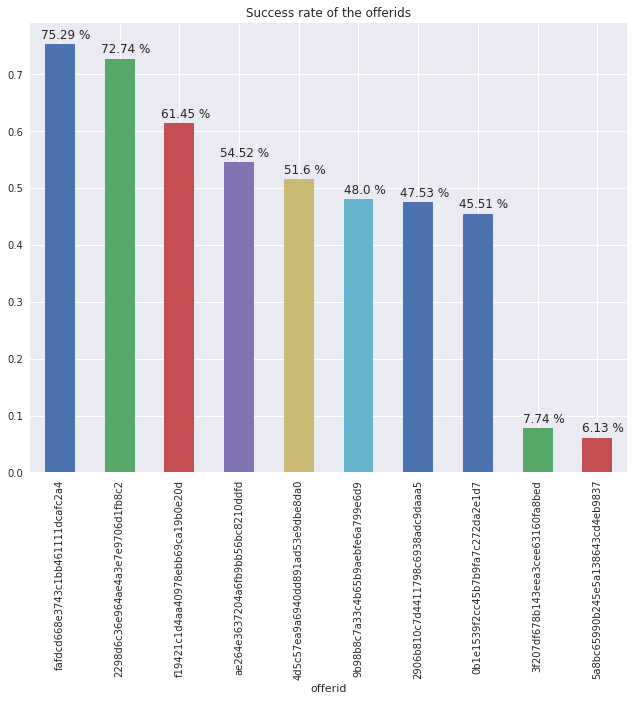

In [155]:
# Visualization
ax = t.plot(kind='bar',x='offerid',y='success_rate', stacked=True, legend=False)
ax.set_title('Success rate of the offerids')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.35, p.get_height()+0.01, str(round(p.get_height()* 100,2))+' %',
            ha="center") 

<font color="green">**Observations:**</font> Above graph shows the unique offers from left to right as per their success rate from highest to lowest.

#### Look into the offer type success rate

In [156]:
# preparing the data

bogo = pd.DataFrame(df.groupby('bogo')['offersuccessful'].sum()).reset_index()
bogo.columns=['bogo','success_count']
bogo_tot = pd.DataFrame(df.groupby('bogo')['offersuccessful'].count()).reset_index()
bogo_tot.columns=['bogo','total_count']
b = pd.merge(left=bogo, right=bogo_tot, left_on='bogo', right_on='bogo')
b['b_success_rate']=b['success_count']/b['total_count']
b = b.drop(['success_count', 'total_count'], axis=1)

info = pd.DataFrame(df.groupby('informational')['offersuccessful'].sum()).reset_index()
info.columns=['info','success_count']
info_tot = pd.DataFrame(df.groupby('informational')['offersuccessful'].count()).reset_index()
info_tot.columns=['info','total_count']
i = pd.merge(left=info, right=info_tot, left_on='info', right_on='info')
i['i_success_rate']=i['success_count']/i['total_count']
i = i.drop(['success_count', 'total_count'], axis=1)

disc = pd.DataFrame(df.groupby('discount')['offersuccessful'].sum()).reset_index()
disc.columns=['disc','success_count']
disc_tot = pd.DataFrame(df.groupby('discount')['offersuccessful'].count()).reset_index()
disc_tot.columns=['disc','total_count']
d = pd.merge(left=disc, right=disc_tot, left_on='disc', right_on='disc')
d['d_success_rate']=d['success_count']/d['total_count']
d = d.drop(['success_count', 'total_count'], axis=1)

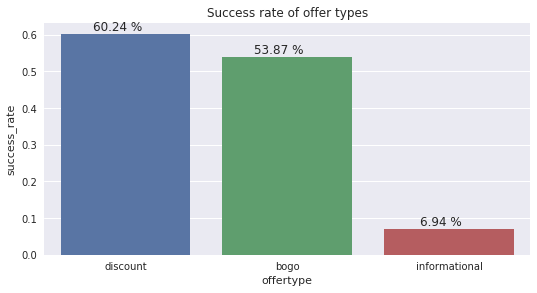

In [157]:
dict1 = [('bogo', b['b_success_rate'].loc[1]),
        ('informational', i['i_success_rate'].loc[1]),
        ('discount', d['d_success_rate'].loc[1])]
        
labels=['offertype','success_rate']
channel = pd.DataFrame.from_records(dict1, columns=labels).sort_values('success_rate', ascending=False)

# visualization
sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.barplot(x='offertype',y='success_rate', data=channel)
ax.set_title('Success rate of offer types')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.35, p.get_height()+0.01, str(round(p.get_height()* 100,2))+' %',
            ha="center") 

<font color="green">**Observation:**</font> People are more inclined towards discounts and least inclined towards informational offers.

#### Look into the success rate as per the gender

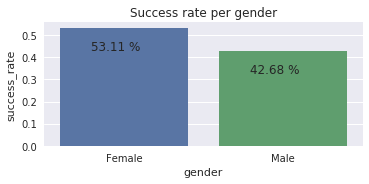

In [158]:
# prepare the data

gender_success = pd.DataFrame(df.groupby('gender')['offersuccessful'].sum()).reset_index()
gender_success.loc[0,'gender']='Female'
gender_success.loc[1,'gender']='Male'
gender_total = pd.DataFrame(df.groupby('gender')['offersuccessful'].count()).reset_index()
gender_total.loc[0,'gender']='Female'
gender_total.loc[1,'gender']='Male'
gender_success.columns=['gender','success_count']
gender_total.columns=['gender','total_count']
g = pd.merge(left=gender_success, right=gender_total, left_on='gender', right_on='gender')
g['success_rate'] = (g["success_count"]/g["total_count"])
g = g.drop(['success_count','total_count'],1)

# visualization
sns.set(rc={'figure.figsize':(5.7,2.27)})
ax = sns.barplot(x='gender',y='success_rate', data=g)
ax.set_title('Success rate per gender')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.35, p.get_height()-0.1, str(round(p.get_height()* 100,2))+' %',
            ha="center") 

<font color="green">**Observation:**</font> Females are more inclined towards using the offers.

#### Look into the success rate as per the channel

In [159]:
# prepare the data

web_success = pd.DataFrame(df.groupby('web')['offersuccessful'].sum()).reset_index()
web_total = pd.DataFrame(df.groupby('web')['offersuccessful'].count()).reset_index()
web_success.columns=['web','success_count']
web_total.columns=['web','total_count']
w = pd.merge(left=web_success, right=web_total, left_on='web', right_on='web')
w['success_rate'] = (w["success_count"]/w["total_count"])
w = w.drop(['success_count','total_count'],1)

email_success = pd.DataFrame(df.groupby('email')['offersuccessful'].sum()).reset_index()
email_total = pd.DataFrame(df.groupby('email')['offersuccessful'].count()).reset_index()
email_success.columns=['email','success_count']
email_total.columns=['email','total_count']
e = pd.merge(left=email_success, right=email_total, left_on='email', right_on='email')
e['success_rate'] = (e["success_count"]/e["total_count"])
e = e.drop(['success_count','total_count'],1)

social_success = pd.DataFrame(df.groupby('social')['offersuccessful'].sum()).reset_index()
social_total = pd.DataFrame(df.groupby('social')['offersuccessful'].count()).reset_index()
social_success.columns=['social','success_count']
social_total.columns=['social','total_count']
s = pd.merge(left=social_success, right=social_total, left_on='social', right_on='social')
s['success_rate'] = (s["success_count"]/s["total_count"])
s = s.drop(['success_count','total_count'],1)

mobile_success = pd.DataFrame(df.groupby('mobile')['offersuccessful'].sum()).reset_index()
mobile_total = pd.DataFrame(df.groupby('mobile')['offersuccessful'].count()).reset_index()
mobile_success.columns=['mobile','success_count']
mobile_total.columns=['mobile','total_count']
m = pd.merge(left=mobile_success, right=mobile_total, left_on='mobile', right_on='mobile')
m['success_rate'] = (m["success_count"]/m["total_count"])
m = m.drop(['success_count','total_count'],1)


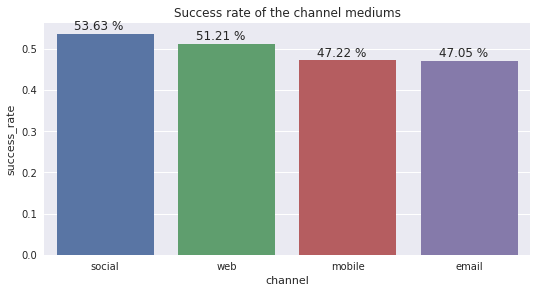

In [160]:
# visualization

dict1 = [('web', w['success_rate'].loc[1]),
        ('mobile', m['success_rate'].loc[1]),
        ('social', s['success_rate'].loc[1]),
        ('email', e['success_rate'].loc[0])]
labels=['channel','success_rate']
channel = pd.DataFrame.from_records(dict1, columns=labels).sort_values('success_rate', ascending=False)

sns.set(rc={'figure.figsize':(8.7,4.27)})
ax = sns.barplot(x='channel',y='success_rate', data=channel)
ax.set_title('Success rate of the channel mediums')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.35, p.get_height()+0.01, str(round(p.get_height()* 100,2))+' %',
            ha="center") 

<font color="green">**Observation:** The offers which were sent via social showed the highest conversion rate/success rate. 

#### Does duration of the offer has anything to do with the conversion/success rate of the offers?

In [161]:
df.duration.unique()

array([ 7,  5,  3, 10,  4])

In [162]:
# prepare the data

duration_success = pd.DataFrame(df.groupby('duration')['offersuccessful'].sum()).reset_index()
duration_total = pd.DataFrame(df.groupby('duration')['offersuccessful'].count()).reset_index()
duration_success.columns=['duration_in_days','success_count']
duration_total.columns=['duration_in_days','total_count']
duration = pd.merge(left=duration_success, right=duration_total, left_on='duration_in_days', right_on='duration_in_days')
duration['success_rate'] = (duration["success_count"]/duration["total_count"])
duration = duration.drop(['success_count','total_count'],1)
duration=duration.sort_values('duration_in_days', ascending=False)

Text(0.5,1,'Success rate vs duration of the offer_type')

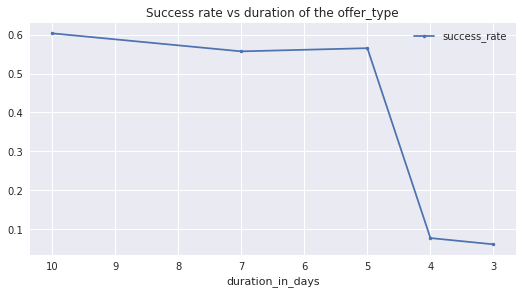

In [163]:
# visualization

duration.plot('duration_in_days','success_rate',style='.-')
plt.gca().invert_xaxis()
plt.title('Success rate vs duration of the offer_type')

<font color="green">**Observation:**</font> Offers with more duration period has more chances to get successful.
<br>
#### Look into the distribution of success rate according the offerid and gender

In [165]:
# prepare the data

z_success = pd.DataFrame(df.groupby(['offerid','gender'])['offersuccessful'].sum()).reset_index()
z_total = pd.DataFrame(df.groupby(['offerid','gender'])['offersuccessful'].count()).reset_index()
z_total.columns = ['offerid','gender','total_count']
z_success.columns=['offerid','gender','success_count']
z = pd.merge(left=z_success, right=z_total, left_on=['offerid','gender'], right_on=['offerid','gender'])
z['success_rate'] = (z["success_count"]/z["total_count"])
z = z.drop(['success_count','total_count'],1)


z.replace(0, "Female", inplace=True)
z.replace(1, "Male", inplace=True)
z.head(5)

,offerid,gender,success_rate
0,0b1e1539f2cc45b7b9fa7c272da2e1d7,Female,0.513388
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,Male,0.412441
2,2298d6c36e964ae4a3e7e9706d1fb8c2,Female,0.801692
3,2298d6c36e964ae4a3e7e9706d1fb8c2,Male,0.674902
4,2906b810c7d4411798c6938adc9daaa5,Female,0.531158


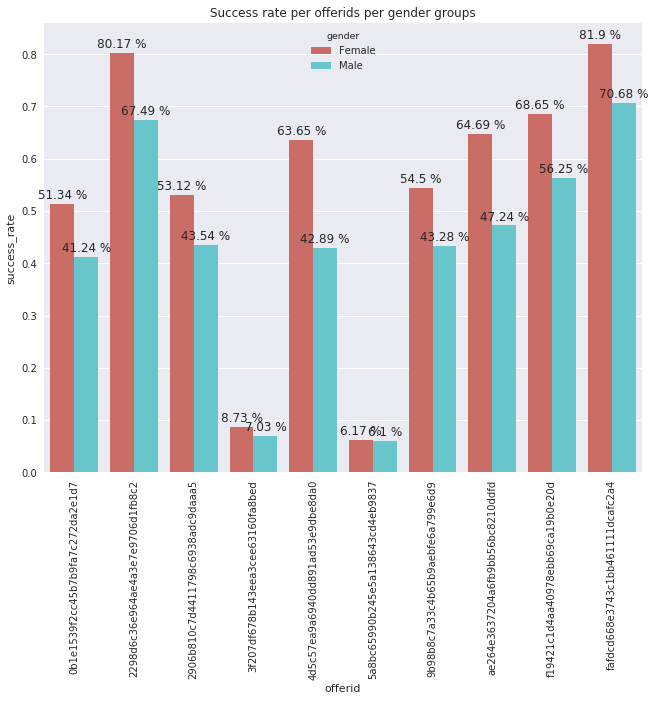

In [166]:
# visualization

sns.set(rc={'figure.figsize':(10.7,8.27)})
ax=sns.barplot(x = 'offerid', y = 'success_rate', hue='gender', data = z,
            palette = 'hls'
            )
ax.set_title('Success rate per offerids per gender groups')
for p in ax.patches:
    ax.text(p.get_xy()[0]+0.20, p.get_height()+0.01, str(round(p.get_height()* 100,2))+' %',
            ha="center") 
for item in ax.get_xticklabels():
    item.set_rotation(90)

<font color="green">**Observation:**</font> Mostly females are more inclined towards using the offers.